<a href="https://colab.research.google.com/github/maxMitsuya/regressao_marketing/blob/main/Regress%C3%A3o_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desafio: Construindo um modelo de Regressão para marketing

## **Contexto - Introdução**

Uma empresa está investindo mensalmente em plataformas de publicidade online, como Youtube, Facebook e newspaper, para a prospecção de leads (pessoas interessadas em seus produtos). A fim de acompanhar o desempenho desses investimentos, a empresa registra todos os gastos com publicidade e todos os retornos de vendas gerados a partir desses investimentos.

Para **entender** melhor **a relação entre as variáveis** presentes nesses registros e **identificar os fatores que mais impactam** na geração de leads, a empresa solicitou a análise de um especialista em dados. **Além disso, a empresa busca criar um modelo de predição** de valores para estimar o retorno de vendas que pode ser gerado a partir de um determinado investimento em publicidade.

## Sobre os dados

A tabela contém informações dos investimentos feitos pelo youtube, facebook, newspaper e também a quantidade de cada.

## Importando biblioteca

In [ ]:
!pip install chart-studio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import chart_studio.plotly as py
import cufflinks as cf

import plotly.express as px
import plotly.graph_objects as go

## Carregando o dataset

In [ ]:
df = pd.read_csv('MKT.csv')

In [ ]:
df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


## Análise descritiva

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


O dataset apresenta 171 registros, sem valores nulos e com tipos de dados corretos para cada coluna de dados.

In [ ]:
df.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


In [ ]:
fig = px.box(df)
fig.show()

A análise descritiva usando o gráfico boxplot possibilitou visualizar um outlier nos investimentos em newspaper, aparentemente a empresa deve ter investido um valor mais elevando.

## Análise Exploratória

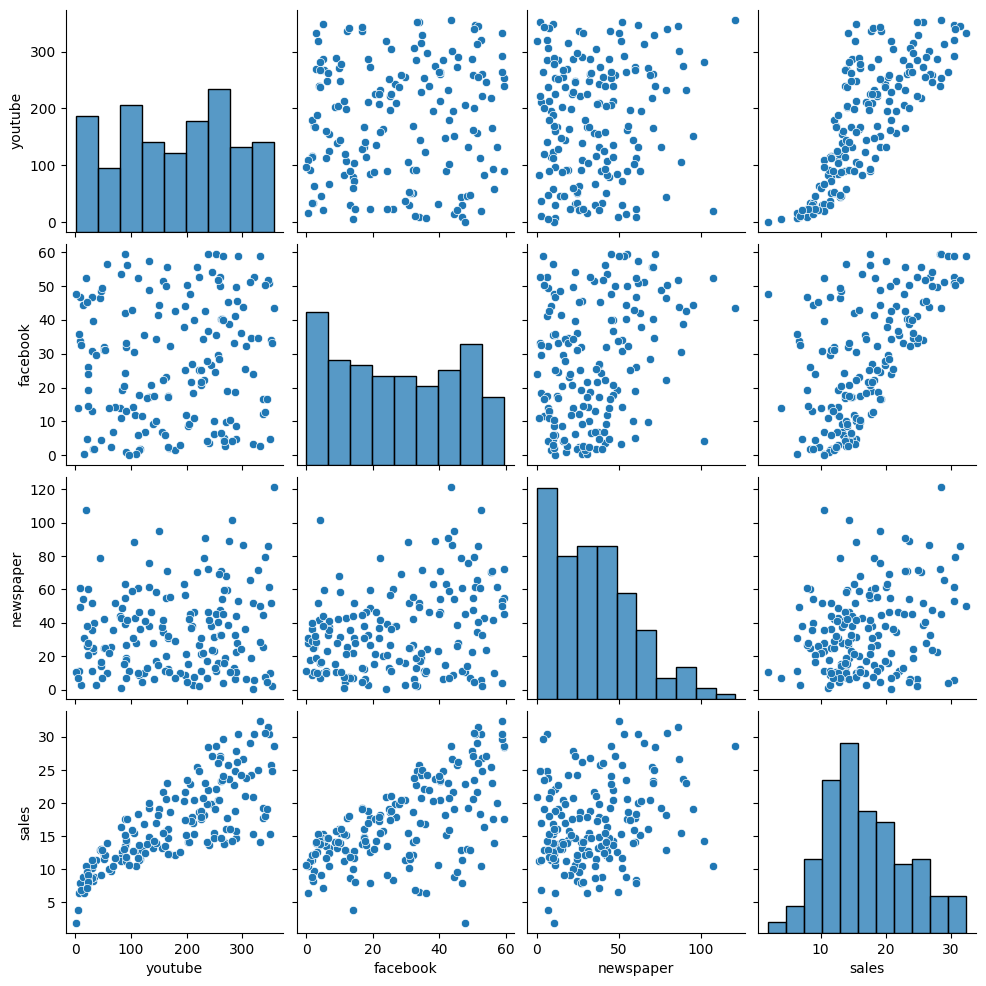

In [ ]:
sns.pairplot(df)

In [ ]:
df.corr()

,youtube,facebook,newspaper,sales
youtube,1.000000,0.086538,0.110759,0.782030
facebook,0.086538,1.000000,0.293425,0.602918
newspaper,0.110759,0.293425,1.000000,0.254987
sales,0.782030,0.602918,0.254987,1.000000


<Axes: >

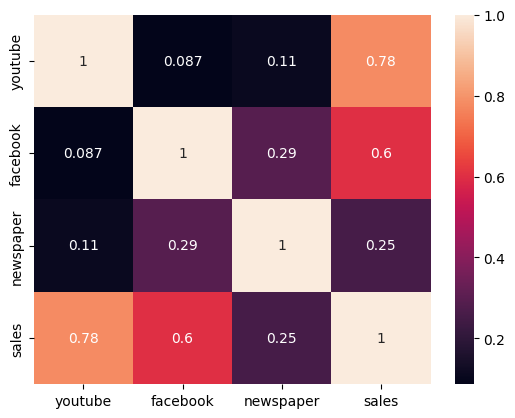

In [ ]:
sns.heatmap(df.corr(), annot=True)

Todas as variáveis possuem correlação positiva em relação as vendas, isso significa que quanto mais investir nas plataformas maiores são as chances de conversão de vendas.

## Modelagem dos dados

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
X = df[['youtube', 'facebook', 'newspaper']] #Variáveis explicativas
Y = df['sales'] #Variável Resposta

In [ ]:
#Divisão da base de dados em 70% treino e 30% teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, random_state = 42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(119, 3)
(52, 3)
(119,)
(52,)


In [ ]:
#Carregar modelo regressão linear
lm = LinearRegression()

In [ ]:
#Treino do modelo
lm.fit(X_train, Y_train)

LinearRegression()

In [ ]:
#Predição dos valores
y_pred = lm.predict(X_test)

In [ ]:
#Avaliação da predição com r2
r = r2_score(Y_test, y_pred)

In [ ]:
#Resultado
print(f"Valor do r quadrado: {r}")

Valor do r quadrado: 0.882423505618885


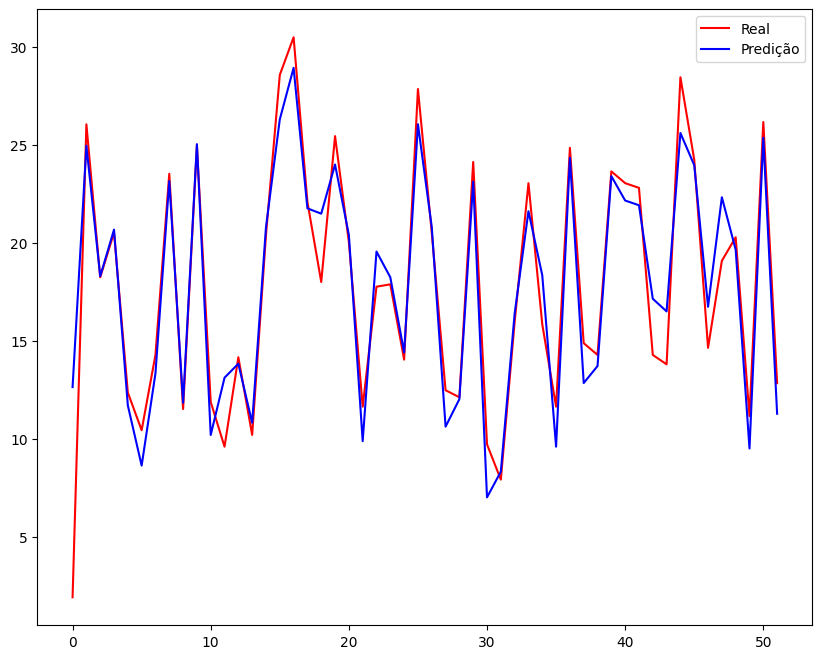

In [ ]:
valores = [i for i in range(len(Y_test))]
fig = plt.figure(figsize=(10,8))
plt.plot(valores, Y_test, color = 'red', label = 'Real')
plt.plot(valores, y_pred, color = 'blue', label = "Predição")
plt.legend()
plt.show()


Pelo valor do r_quadrado podemos dizer que caso haja alteração positivas/negativas nas variáveis explicativas, temos 88% de chances de haver alterações positivas/negativas na variável resposta. Provavelmente, teríamos um resultado melhor caso a base de dados tivesse mais registros.